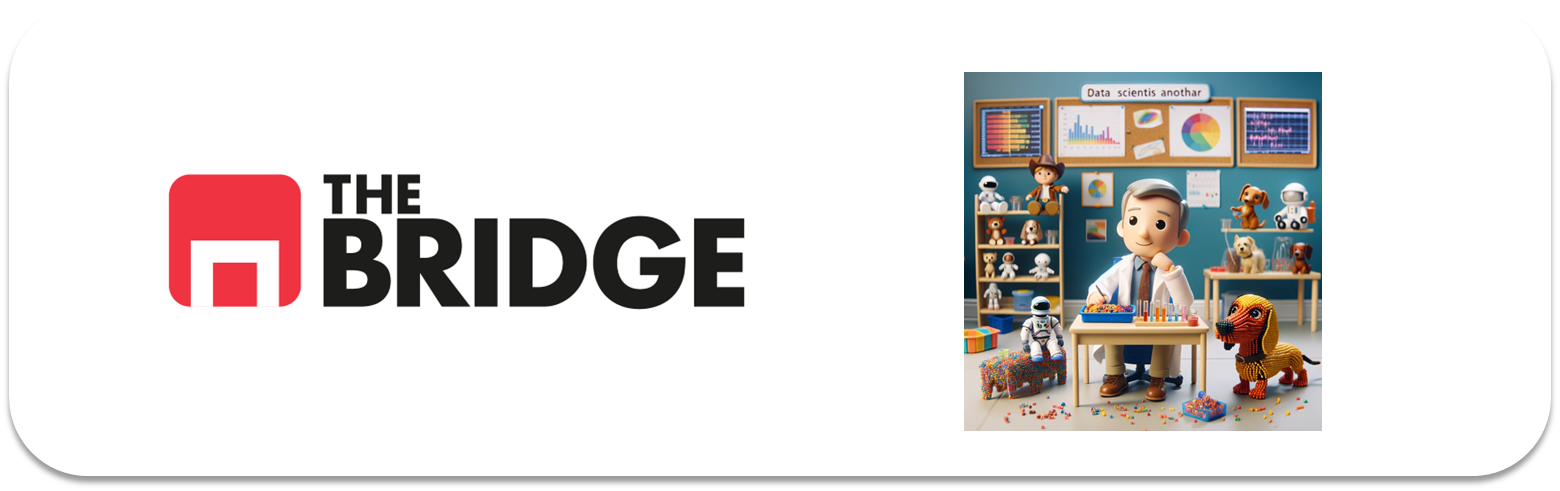

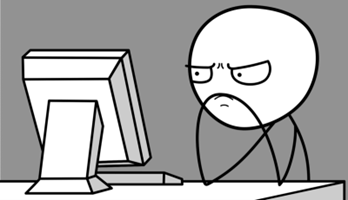

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
#%pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# No hay imports raros son los imports de los notebooks del workout :-)
# Ahora sí que en vez de usar las funciones definidas en los workout se emplean las indicadas a lo largo de los ejercicios importándolas del módulo correspondiente
from bootcampviztools import *

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [5]:
df_admisiones = pd.read_csv("./data/admission_data.csv")
df_admisiones.head()

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected


In [6]:
df_admisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB


*Como ya lo sé de la tanda de ejercicios anteriores, me voy a cargar la primera columna*

In [7]:
df_admisiones.drop(columns="Unnamed: 0", inplace = True)

### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

*La variable Year la consideré una variable numérica discreta, las variables de este tipo admiten una doble valoración como numéricas y como categóricas, así que voy a sacar los valores de tendencia central y las frecuencias. Aunque sé claramente que no tiene sentido, es para no perder hábitos sistemáticos*

In [8]:
# Tendencia central y medidas de posición
df_admisiones.Year.describe()

count    12763.0
mean      1973.0
std          0.0
min       1973.0
25%       1973.0
50%       1973.0
75%       1973.0
max       1973.0
Name: Year, dtype: float64

In [9]:
# Frecuencias con numeros
print("Moda:",df_admisiones.Year.mode())
print("Frecuencias Absolutas:\n", df_admisiones.Year.value_counts())
print("Frecuencias Relativas: \n", df_admisiones.Year.value_counts(normalize = True) * 100)


Moda: 0    1973
Name: Year, dtype: int64
Frecuencias Absolutas:
 Year
1973    12763
Name: count, dtype: int64
Frecuencias Relativas: 
 Year
1973    100.0
Name: proportion, dtype: float64


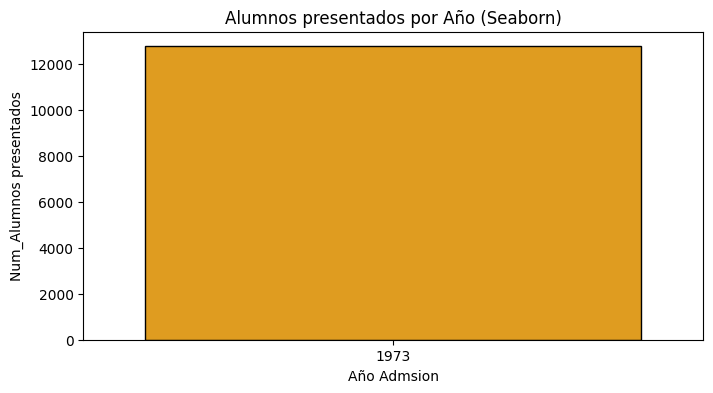

In [10]:
# Frecuencias Visualmente: como en el notebook de visualizaciones
plt.figure(figsize=(8, 4))
sns.barplot(x = df_admisiones["Year"], y = df_admisiones["Year"].value_counts(), color='orange', edgecolor='black')
plt.title('Alumnos presentados por Año (Seaborn)')
plt.xlabel('Año Admsion')
plt.ylabel('Num_Alumnos presentados')
plt.show()


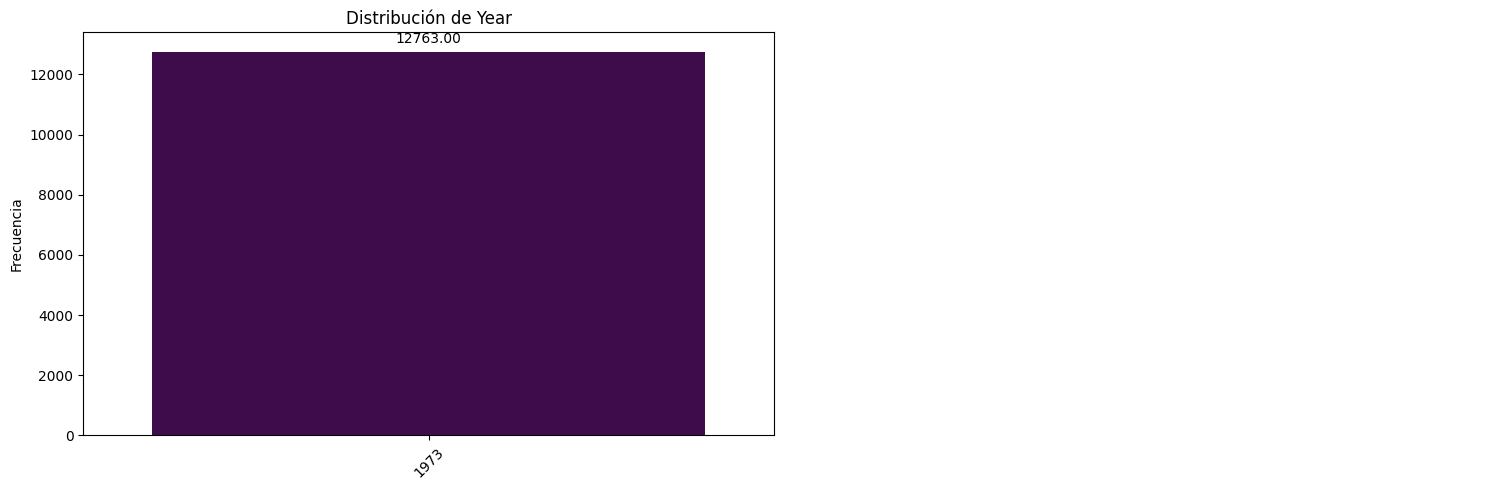

In [11]:
# Frecuencias Visualmente: utilizando la sugerida en ejercicios posteriores
pinta_distribucion_categoricas(df_admisiones, ["Year"], mostrar_valores= True)

*En definitiva, **lo que no varía, en general, no aporta** ocurre igual que con la columna "mes" del dataset de viajes, así que la quito del análisis. Eso sí me apunto esta "limitación" o condición del estudio "Análisis realizado para el año 1973"*

In [12]:
df_admisiones.drop(columns= "Year", inplace= True)

### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

*Como veo que lo voy a usar en los siguientes ejercicios me creo una función que me devuelva las frecuencias absolutas y relativas de una columna de un dataframe*

In [13]:
def frecuencias(df, columna_categorica, porcentaje = True):
    frec_abs = df[columna_categorica].value_counts() # Values_counts() me da las frecuencias absolutas
    frec_rel = df[columna_categorica].value_counts(normalize=True) * (100 if porcentaje else 1)  # Si activo el argumento normalize me da las relativas en tanto por 1, el argumento porcentaje de la función me permite pasarlo a tanto por cien

    # Crear DataFrame con ambas frecuencias
    frec_df = pd.DataFrame({'Frecuencia Absoluta': frec_abs, 'Frecuencia Relativa': frec_rel})

    return frec_df



*Y comienzo el análisis*

In [14]:
# Valores numéricos:
df_frecuencias = frecuencias(df_admisiones, "Major")
df_frecuencias

,Frecuencia Absoluta,Frecuencia Relativa
Major,,
Other,7924,62.085717
Department of Physics and Astronomy,1246,9.762595
School of Medicine,918,7.192666
Department of Mechanical Engineering,792,6.205438
Department of Psychology,714,5.594296
Department of Economics,585,4.583562
School of Political Science and International Relations,584,4.575727


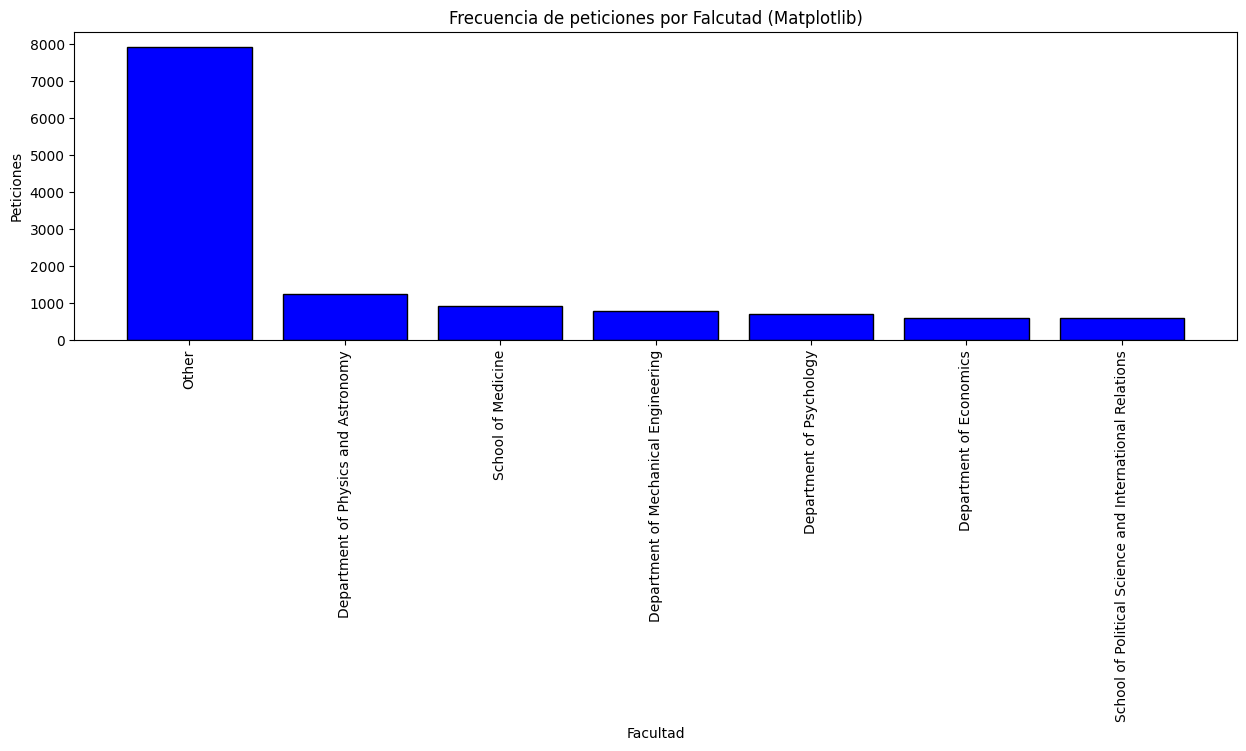

In [15]:
# Visualmente, frecuencias absolutas: Usando las funciones de matplotlib según el notebook de visualizaciones
plt.figure(figsize=(15, 4))
plt.bar(df_frecuencias.index, df_frecuencias["Frecuencia Absoluta"], color='blue', edgecolor='black') # Primero las etiquetas (en este caso el nombre de los departamentos que considero), luego los valores
plt.title('Frecuencia de peticiones por Falcutad (Matplotlib)')
plt.xlabel('Facultad')
plt.ylabel('Peticiones')
plt.xticks(rotation = 90) # Añadido para que los nombres se puedan ver
plt.show()


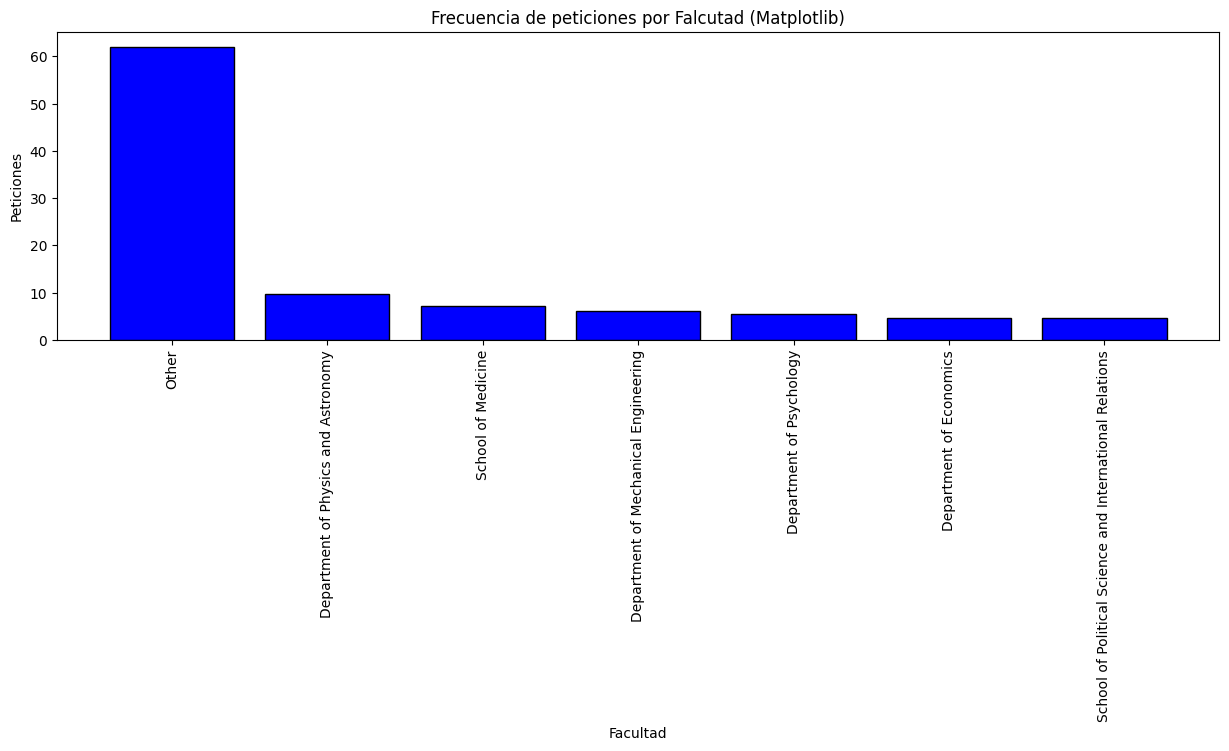

In [16]:
# Visualmente, frecuencias relativas: Usando las funciones de matplotlib según el notebook de visualizaciones
plt.figure(figsize=(15, 4))
plt.bar(df_frecuencias.index, df_frecuencias["Frecuencia Relativa"], color='blue', edgecolor='black') 
plt.title('Frecuencia de peticiones por Falcutad (Matplotlib)')
plt.xlabel('Facultad')
plt.ylabel('Peticiones')
plt.xticks(rotation = 90) # Añadido para que los nombres se puedan ver
plt.show()


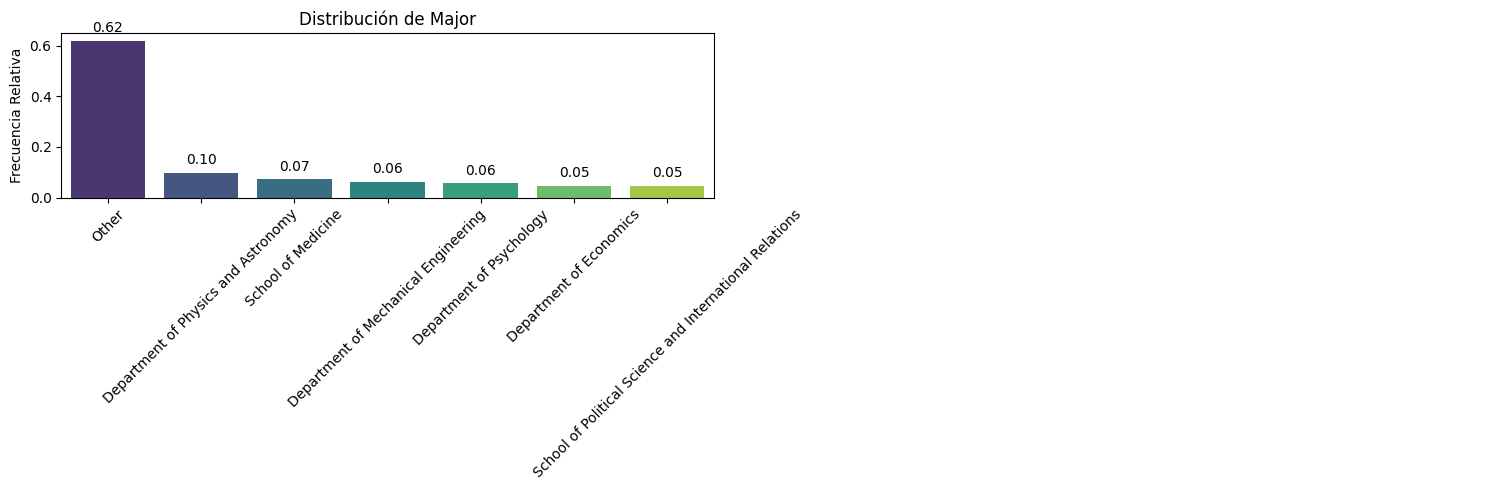

In [19]:
# Visualmente frecuencias relativas: Usando las funciones que nos indica el enunciado
pinta_distribucion_categoricas(df_admisiones, ["Major"], relativa= True, mostrar_valores= True)

### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

* *Como siempre, lo que más destaca (la moda): En el dataset se ve claramente que los departamentos representados no representan la mayoría de las admisiones (que están en Others con clara mayoría (62-38)). Tendré que tenerlo en cuenta a la hora de sacar conclusiones*
* *Los siguiente ya es apuntar los valores para cada departamento y su orden (Física el siguiente con un 9.76%, luego medicina con un 7.2, luego Ingeniería Mecánica con un 6.5, etc, etc)*
* *Aunque por temas de espacio aquí no seamos exahustivos eso no quiere decir que en tus notas no lo seas.*


### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

*Visto como manejarse con los gráficos del notebook en las soluciones de los ejercicios anteriores voy a ir directo a las gráficas mostrando valores*

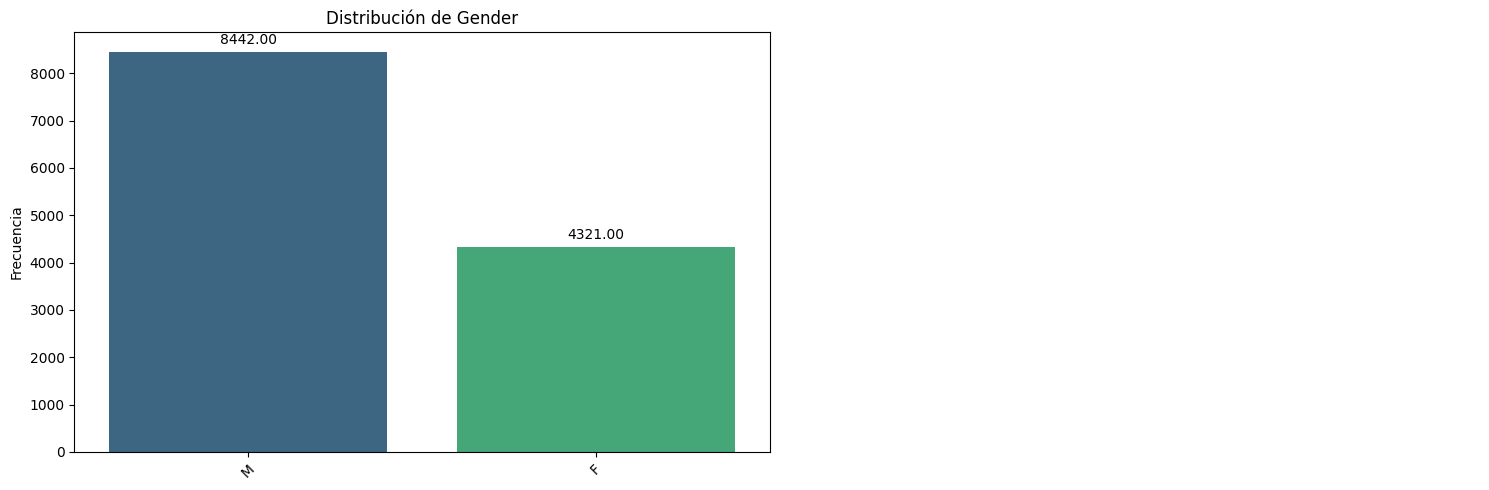

In [21]:
pinta_distribucion_categoricas(df_admisiones, ["Gender"], relativa= False, mostrar_valores= True)

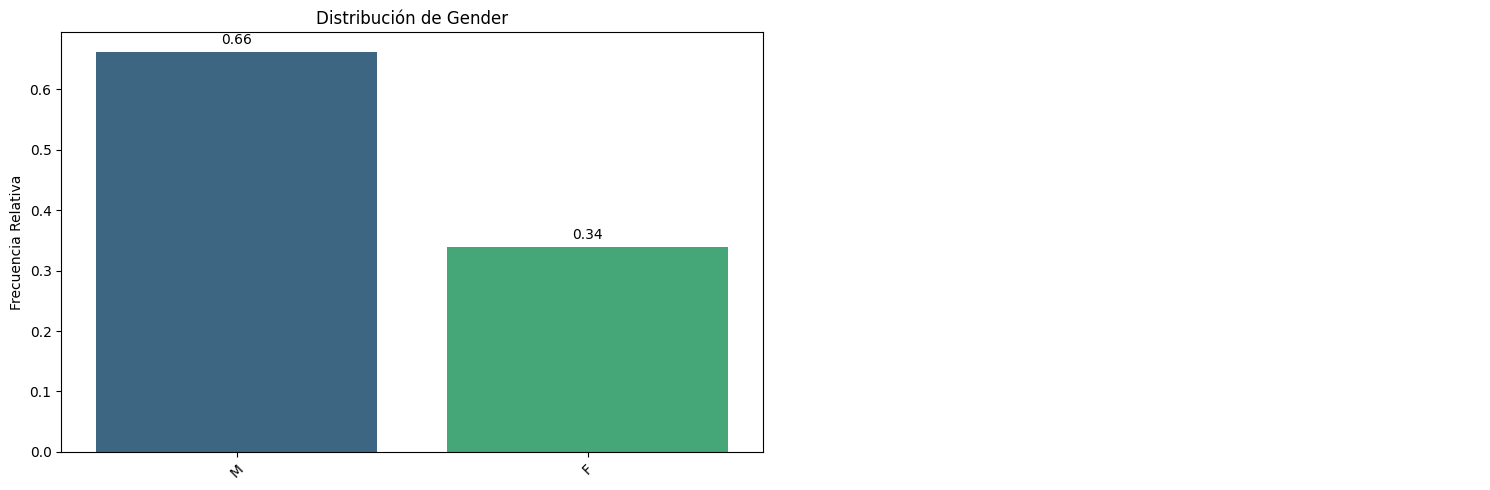

In [22]:
pinta_distribucion_categoricas(df_admisiones, ["Gender"], relativa= True, mostrar_valores= True)

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

* *Hay una clara mayoría de aplicaciones tipificadas como género masculino (66-34) (suponemos que M es male)*

* *Las aplicaciones de genero "masculino" representan un 66% de las aplicaciones* 

* *Las aplicaciones de genero "femenino" representan un 34% de las aplicaciones*

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

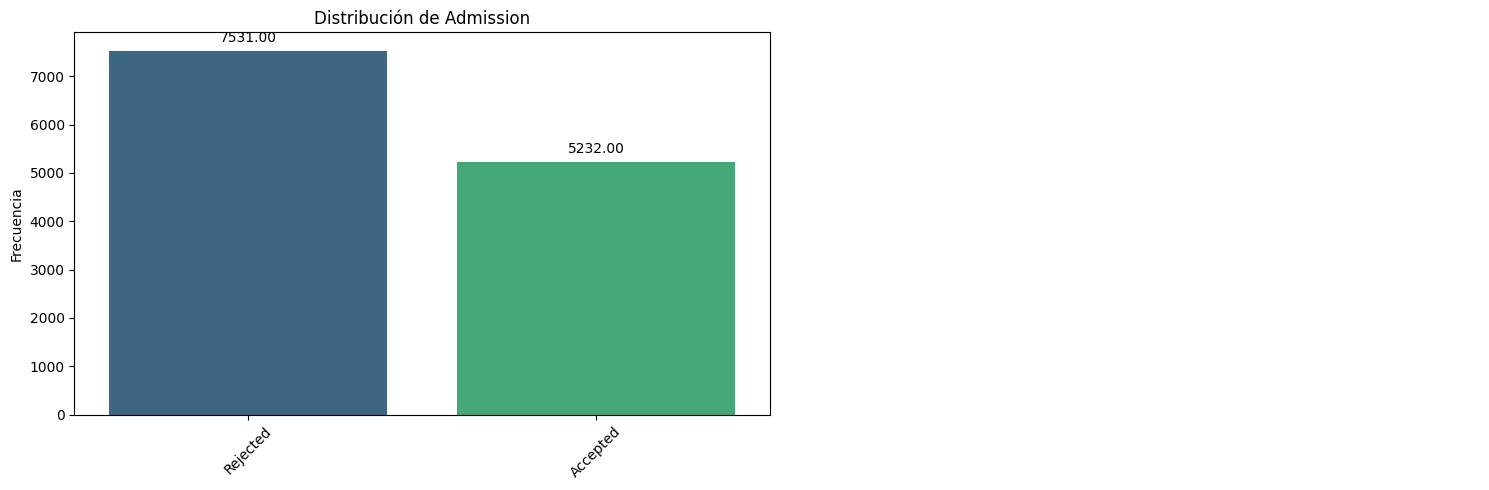

In [24]:
pinta_distribucion_categoricas(df_admisiones, ["Admission"], relativa= False, mostrar_valores= True)

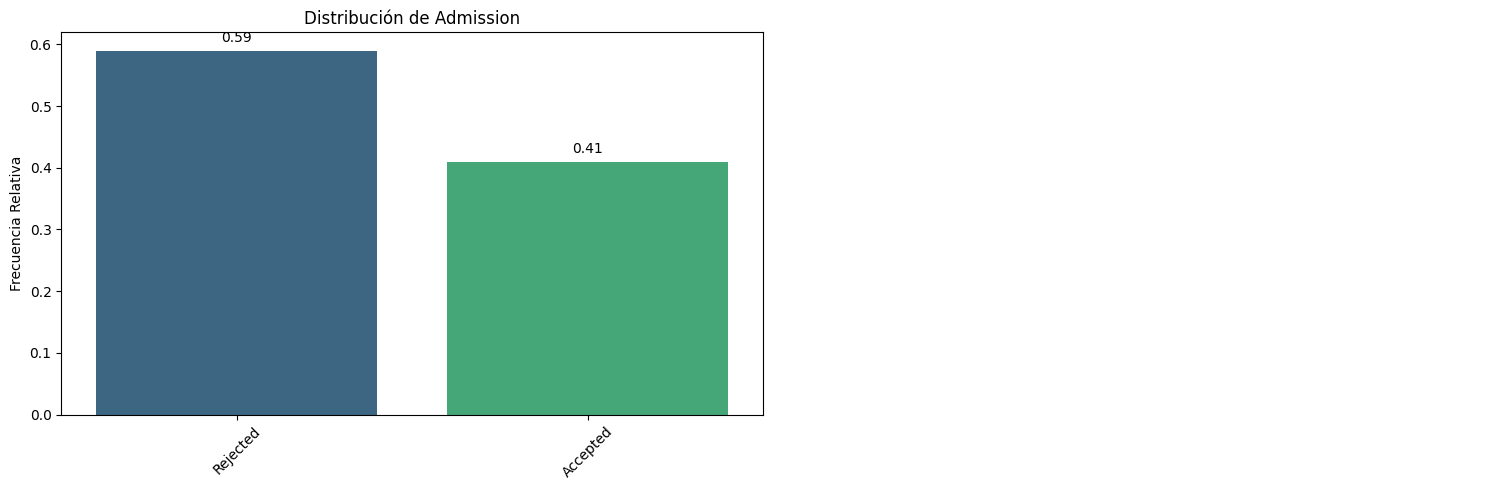

In [26]:
pinta_distribucion_categoricas(df_admisiones, ["Admission"], relativa= True, mostrar_valores= True)

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

* *El porcentaje de rechazos es sensiblemente mayor que el de aceptaciones (59%-41%)*
* *El porcentaje de rechazos es del 59%*
* *El porcentaje de aceptaciones es del 41%*

*Por ahora de este dataset podemos decir: Para el año 1973* 
* *Es una universidad en la que los departamentos contemplados como individuales acaparan el 38% de peticiones de admisión, y el resto el 62%*
* *Es una universidad con mayor número y porcentaje de peticiones masculinas que femeninas (un 66% a un 34%) de 12763 peticiones.*
* *Es una universidad que rechaza más que acepta (59%-41%)*


### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

In [27]:
df_tips = pd.read_csv("./data/tips.csv")
df_tips.head()


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [29]:
# Vuelvo a quitarme esa columna que es un indice duplicado
df_tips.drop(columns= "Unnamed: 0", inplace = True)

### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

In [30]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

In [31]:
# Con la función indicada en el enunciado
plot_multiple_boxplots(df_tips,["total_bill","tip","size"])

NameError: name 'plot_multiple_boxplots' is not defined

*Mis anotaciones:*
* *"total_bill" tiene una media de 19.78, una mediana de 17.8, un rango entre 3.07 y 50 y con el gráfico de cajas veo que tiene una cierta dispersión pero tampoco excesiva (visualmente), podríamos considerar algunos valores ya como outliers y algo de simetría entorno a la mediana aunque más cerca del Q1 que del Q3, hay más dispersión en los valores superiores a la mediana.*
* *"tip" tiene una media de 3 (2.99), una mediana de 2.9, y un rango de 1.56. Viendo el boxplot, se ve (ancho de la caja) cierta concentración de valores, algo de simetría entorno a la mediana (pero esta está más cerca del Q3 que del Q1), hay más dispersión en los valores bajos que en los altos. Además también podríamos pensar en considerar algunos outliers.*
* *"size" tiene una media de 2.56 y una mediana de 2 (que quizás le represente mejor), pero viendo su rango de valores, es mejor completar el análisis con un análisis frecuencial (eso es lo bueno de los numéricos discretos). Yo me quedaría con la mediana como mejor representación del tamaño que con la media.*
* *Si las medias fueran buenas referencias (que parece que sí pero es algo a completar con el análisis de dispersión-histogramas) podríamos tener en la cabeza para comprobar después que las propinas son 1/7 veces las facturas (es decir un 14% más o menos del total) y se me plantea una hipótesis de estudio: ¿es ese 14% un valor muy centrado es decir, podría pensar que es algo cultural dar más o menos ese 14% como propina?*
* *Considerando lo anterior, ¿se mantendrá el porcentaje en los outliers?¿Corresponden los outliers de una a la otra?*
* *Yo necesito el análisis de dispersión/distribución para poder decir algo más y tratar los posibles outliers*

### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

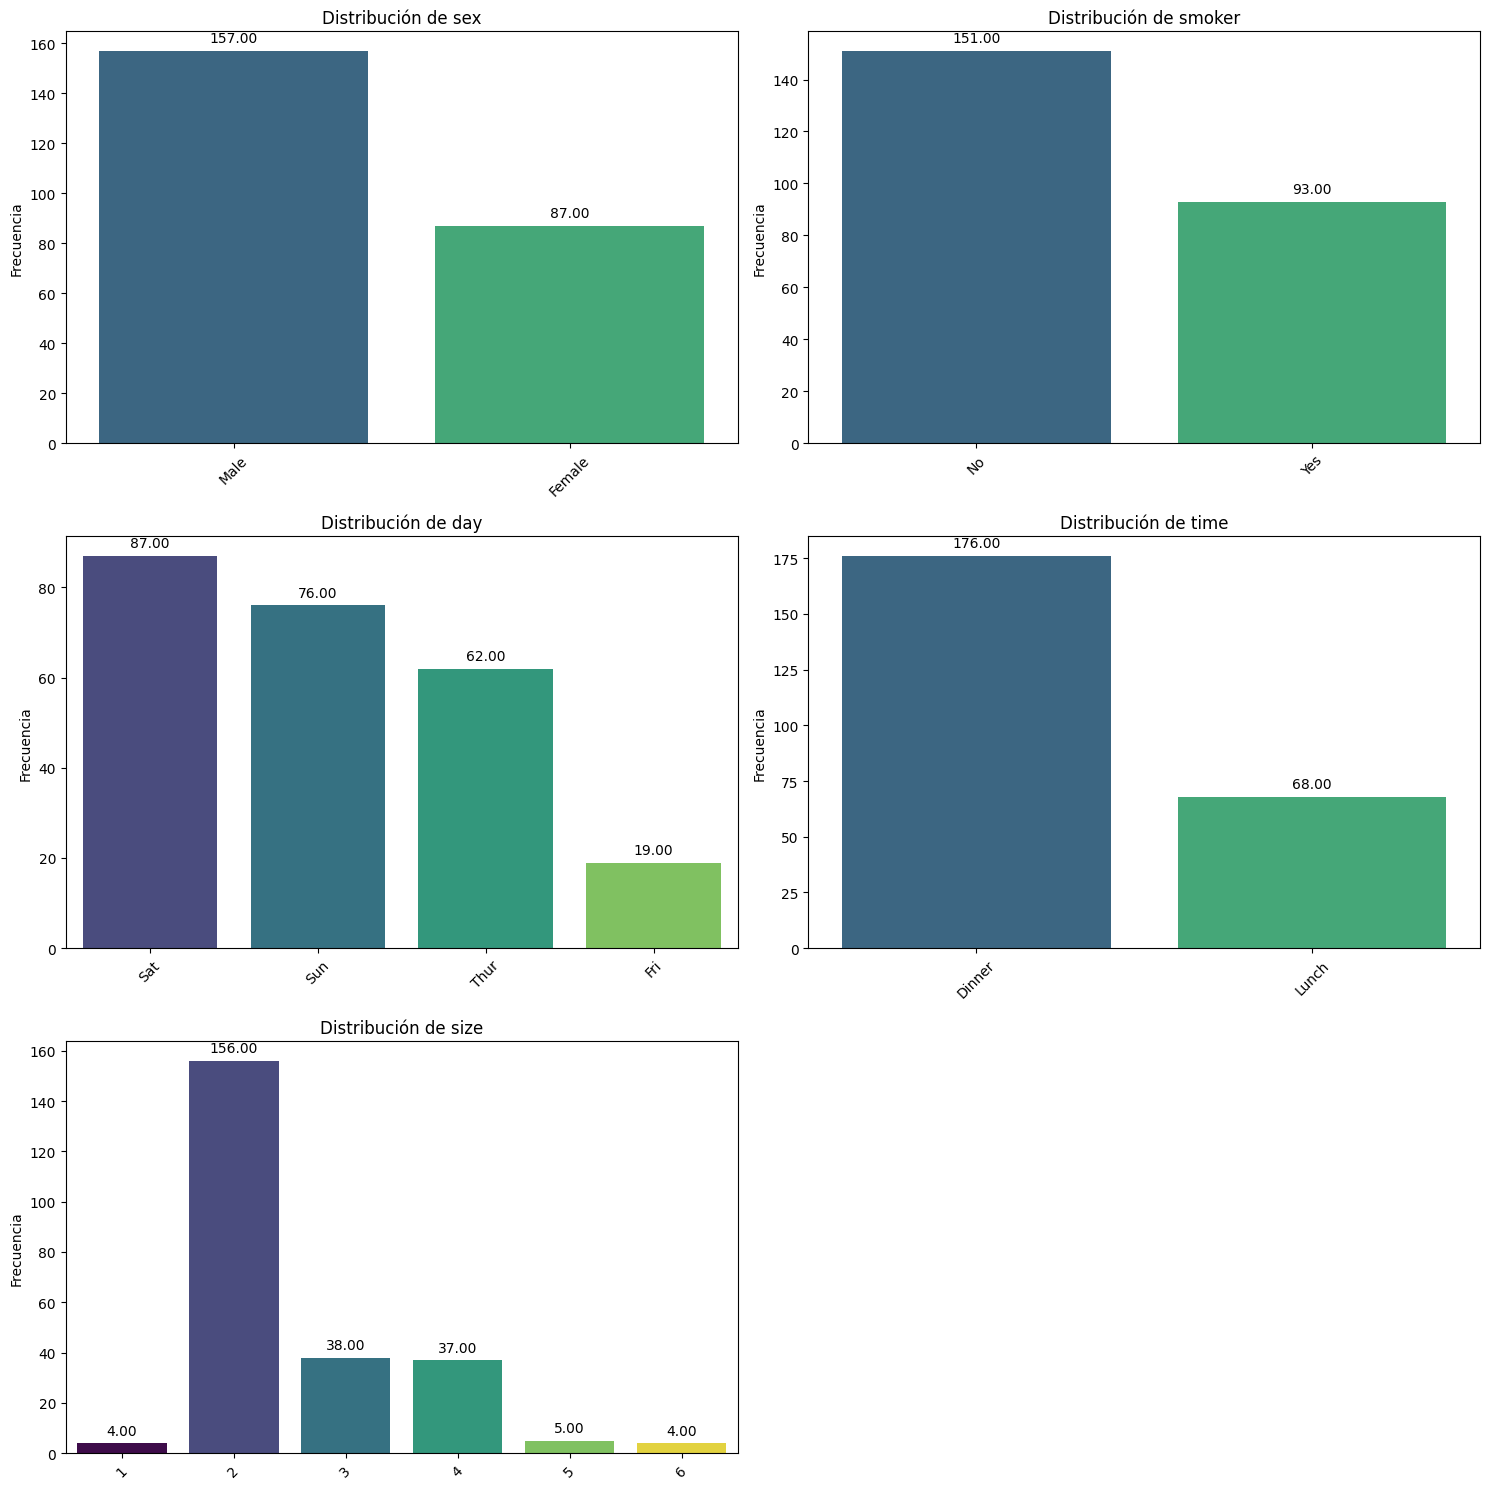

In [ ]:
pinta_distribucion_categoricas(df_tips, ["sex","smoker","day","time","size"], mostrar_valores= True)

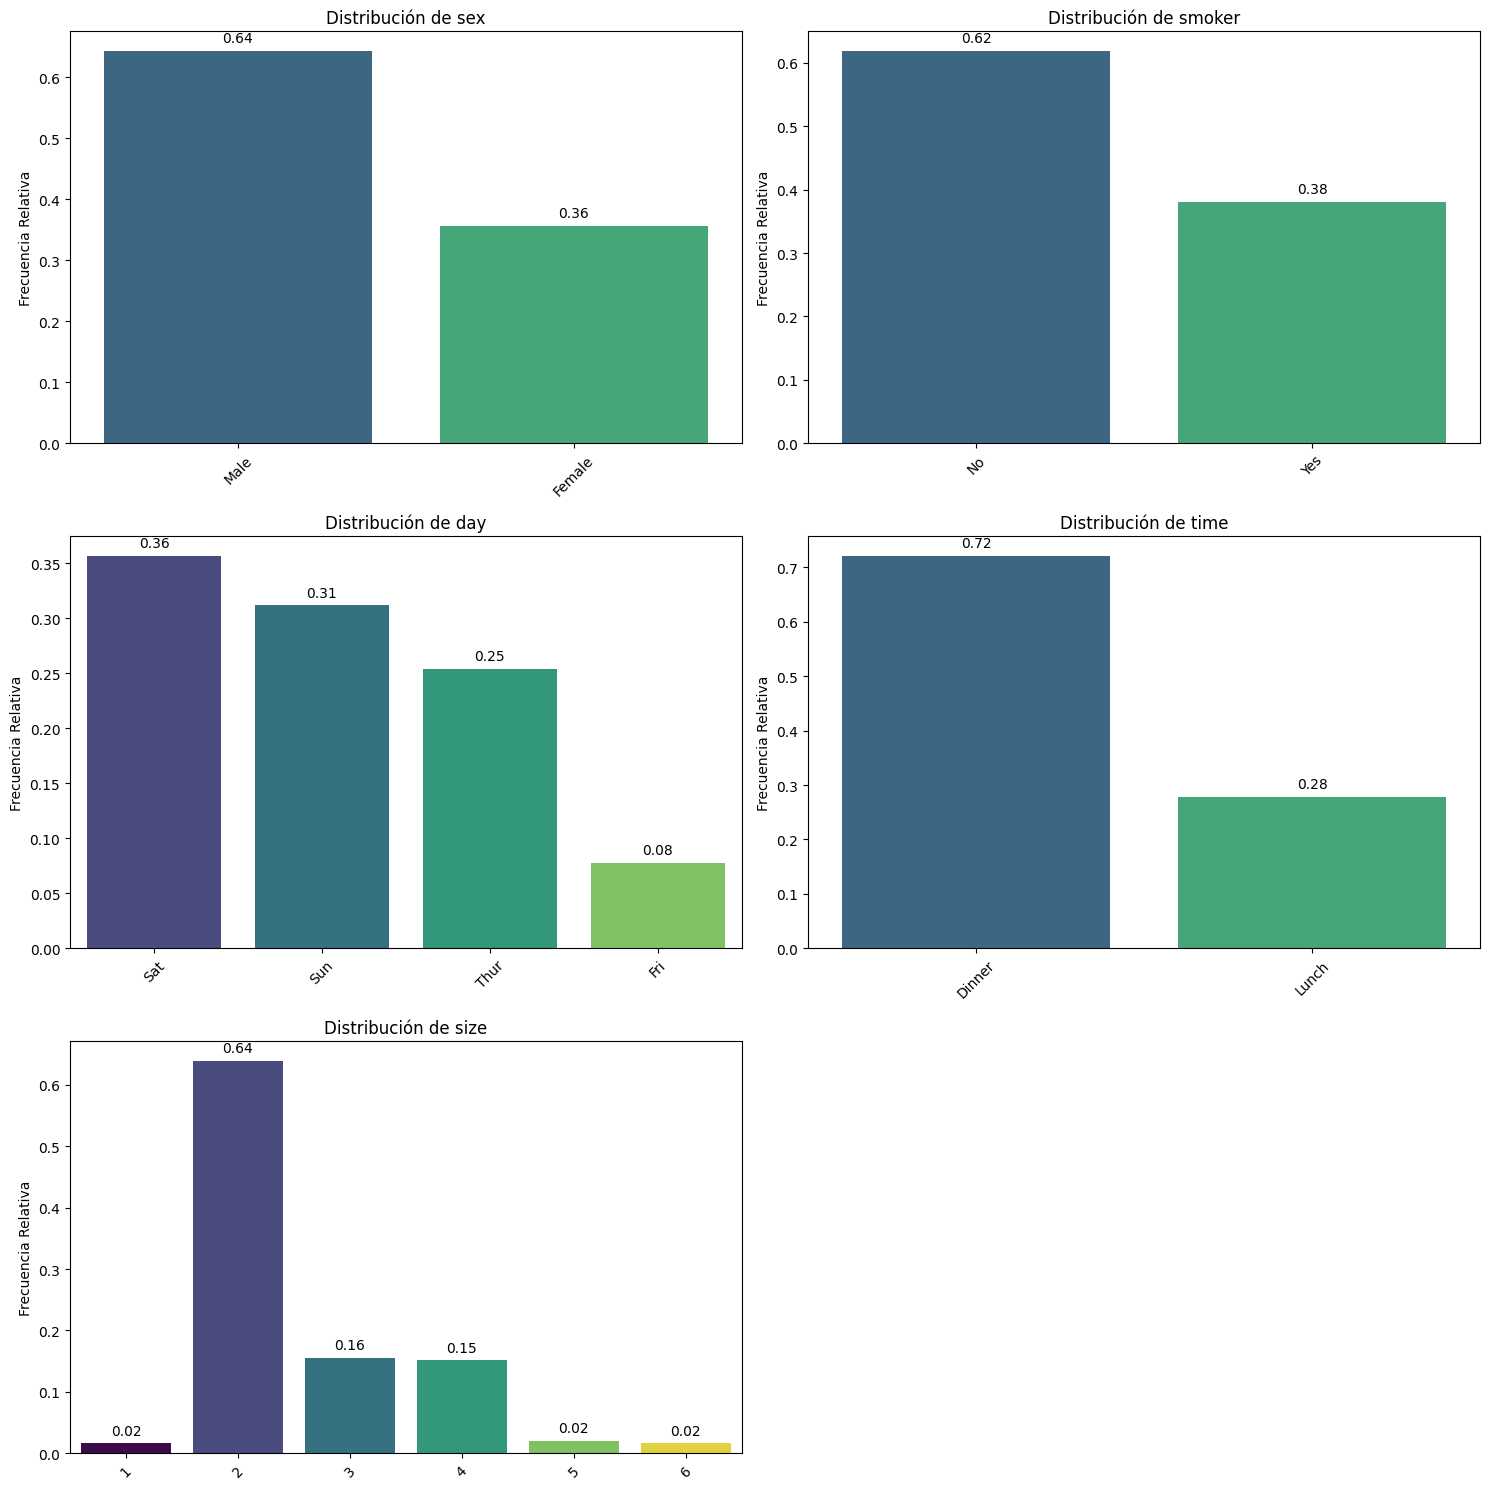

In [ ]:
pinta_distribucion_categoricas(df_tips, ["sex","smoker","day","time","size"], mostrar_valores= True, relativa = True)

* *Es un dataset con más no fumadores que fumadores (62%-38%)*
* *La distribución de frecuencias de la variable "sex" muestra también un desbalanceo hacia el cliente masculino (64%-36%)*
* *Es un dataset mayoritariamente de fin de semana (67%-33%)
* *Es un dataset mayoritariamente de comidas frente a cenas (72%-28%)
* *Para terminar me reafirmo en quedarme con el valor de 2 como tamaño representativo de los grupos (64%-36%). Me surge la pregunta de si el dataset es por grupos, entonces las variables "sex" y "gender" hacen referencia a quién ¿al que paga? (Tendría que preguntar esto a la fuente de los datos)*

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)


In [ ]:
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
perfilado = ["education", "state", "employmentstatus", "gender", "marital_status", "vehicle_class", "vehicle_size"]
df_seguros.groupby(perfilado)["customer"].count().nlargest(5)

education  state       employmentstatus  gender  marital_status  vehicle_class  vehicle_size
College    California  Employed          F       Married         Four-Door Car  Medsize         79
           Oregon      Employed          F       Married         Four-Door Car  Medsize         78
Bachelor   California  Employed          F       Married         Four-Door Car  Medsize         76
College    California  Employed          M       Married         Four-Door Car  Medsize         75
Bachelor   California  Employed          M       Married         Four-Door Car  Medsize         72
Name: customer, dtype: int64

*Es decir tenemos que hacer la agrupacion por todos los posibles valores y obtener la moda de esa agrupación, otra cosa es que de nuevo los valores cercanos sean muchos*  
*En este caso, nuestro cliente típico se parece mucho al que nos dan las modas por separado: Mujer californiana o de Oregón, trabajadora, con educación entre College y Bachelor, casada, con un turismo cuatro puertas* 